# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Using the admission data, determine how likely a candidate is to gain admission given their GPA, GRE, and the Prestige of their Undergraduate Program.

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: 

The data was provided by our teacher. The data includes 4 variables  - 'Admit', 'GPA', 'GRE', and 'Prestige', each with 400 records. 3 Records were dropped due to a NaN, so 397 records were used in the analysis. The minimum GPA was 0, max was 4; Min GRE was 200, max was 800. The Ranking was split into dummy variables with the follwing logic: Rank 1 is the 'best' school, and is considered the reference category.


### Demo: Provide a table that explains the data by admission status

Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import seaborn as sns


/Users/eddywi/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
df = df.join(pd.get_dummies(df['prestige'],prefix='prestige'))
df = df.drop('prestige',1)
df.head()

,admit,gre,gpa,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,0,380.0,3.61,0,0,1,0
1,1,660.0,3.67,0,0,1,0
2,1,800.0,4.00,1,0,0,0
3,1,640.0,3.19,0,0,0,1
4,0,520.0,2.93,0,0,0,1


In [4]:
stats=df.groupby('admit').mean()
stats['Stat']='Mean'
stats=stats.append(df.groupby('admit').std())
stats.fillna('Std')

,Stat,gpa,gre,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
admit,,,,,,,
0,Mean,3.347159,573.579336,0.103321,0.350554,0.343173,0.202952
1,Mean,3.489206,618.571429,0.261905,0.420635,0.222222,0.095238
0,Std,0.376355,116.052798,0.304941,0.478026,0.475647,0.402941
1,Std,0.371655,109.257233,0.441426,0.495632,0.417399,0.294715


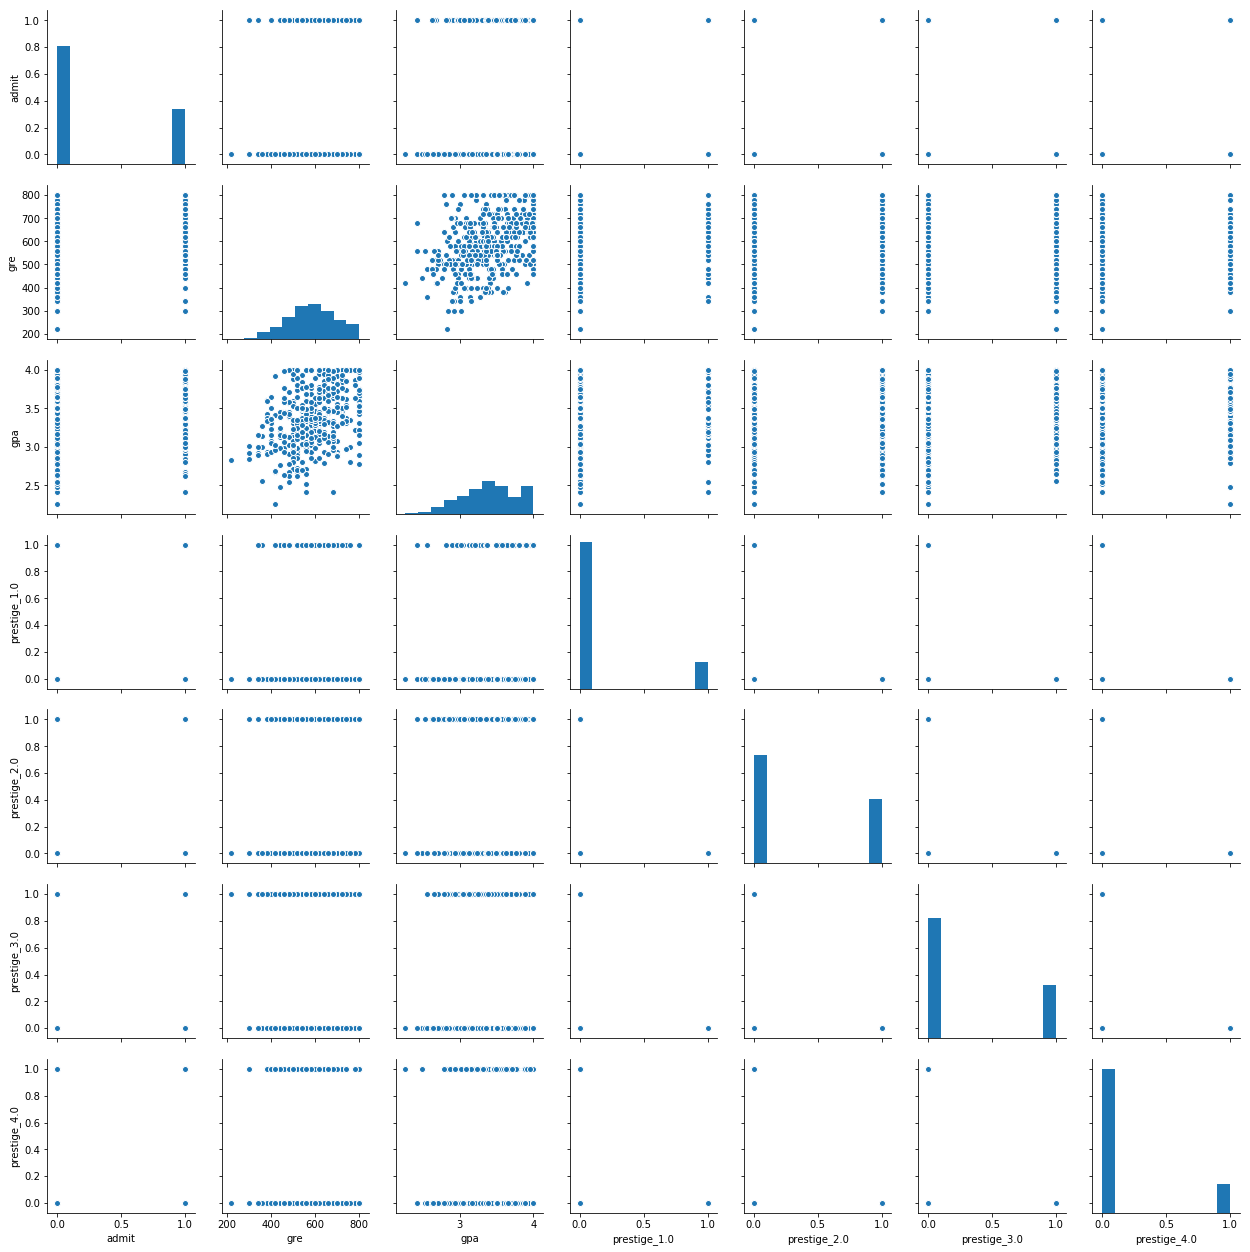

In [5]:
sns.pairplot(df)


### Methods: Write up the methods used in your analysis

Answer: Used SKLearn to evaluate the relationship between the predictors and the outcome via logiztic regression modeling. 

### Results: Write up your results

Answer: The probability of being accepted with perfect GRE & GPA is 0.73 for a Tier 1 school, 0.56 for a Tier 2 school, .42 for a Tier 3 school, and .37 for a Tier 4 school.

### Visuals: Provide a table or visualization of these results

See above or  in Project 3

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: See in Project 3